In [51]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, binarize

(200, 2) (200, 2)


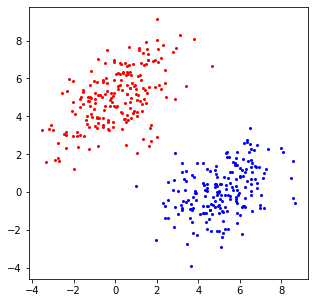

In [35]:
m1 = [[0, 5]]
m2 = [[5, 0]]
C = [[2, 1], [1, 2]]
numPerClass = 200
A = np.linalg.cholesky(C)
U1 = np.random.randn(numPerClass, 2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(numPerClass, 2)
X2 = U2 @ A.T + m2
print(X1.shape, X2.shape)
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X1[:,0], X1[:,1], c = 'r', s = 4)
ax.scatter(X2[:,0], X2[:,1], c = 'b', s = 4)

In [36]:
X = np.concatenate([X1, X2], axis=0)
labelPos = np.ones(numPerClass)
labelNeg = -1.0 * np.ones(numPerClass)
y = np.concatenate([labelPos, labelNeg])

In [37]:
# shuffle X and y
rIndex = np.random.permutation(2 * numPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
X_train = Xr[:numPerClass,:]
y_train = yr[:numPerClass]
X_test = Xr[numPerClass:2*numPerClass]
y_test = yr[numPerClass:2*numPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(200, 2) (200,) (200, 2) (200,)


In [38]:
# compute the accuracy of classification
def PercentCorrect(inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        oneInput = inputs[n,:]
        if (targets[n] * np.dot(oneInput, weights)) > 0:
            nCorrect += 1
    return 100 * nCorrect / N

In [39]:
# Main loop
# initialize weight

w = np.random.randn(2)
alpha = 0.005
MaxIter = 1000
p_train = np.zeros(MaxIter)
p_test = np.zeros(MaxIter)
for iter in range(MaxIter):
    r = np.floor(np.random.rand()*len(X_train)).astype(int)
    x = X_train[r,:]
    if y_train[r] * np.dot(x, w) < 0:
        # update weight
        w += alpha * y_train[r]*x
    p_train[iter] = PercentCorrect(X_train, y_train, w)
    p_test[iter] = PercentCorrect(X_test, y_test, w)
    

print("Percentage Correct After Training: %6.2f %6.2f" %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


Percentage Correct After Training: 100.00 100.00


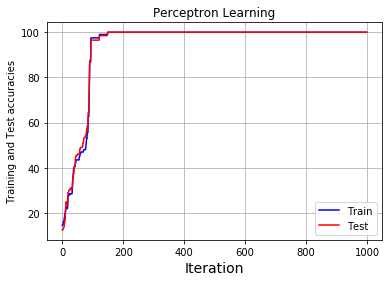

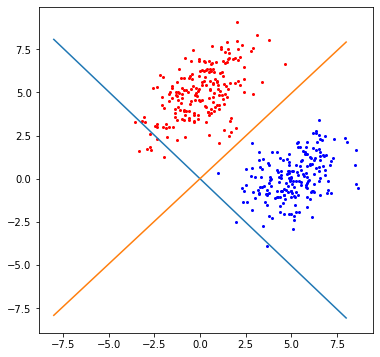

In [42]:
fig, ax = plt.subplots(figsize = (6,4))
ax.plot(range(MaxIter), p_train, 'b', label = "Train")
ax.plot(range(MaxIter), p_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test accuracies")
ax.set_xlabel("Iteration", fontsize = 14)
plt.savefig("LearningCurvesalpha0.005.png")
plt.figure(figsize=(6,6))
plt.scatter(X1[:,0], X1[:,1], c = 'r', s = 4)
plt.scatter(X2[:,0], X2[:,1], c = 'b', s = 4)
plt.plot(np.linspace(-8,8,8),w[1]/w[0] * np.linspace(-8,8,8))
plt.plot(np.linspace(-8,8,8),-w[0]/w[1] * np.linspace(-8,8,8))
plt.savefig('decisionBoundary1.png')

In [8]:
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.3f" %(accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.3f" %(accuracy_score(yh_test, y_test)))




Accuracy on training set:  1.000
Accuracy on test set:  1.000


(200, 2) (200, 2)


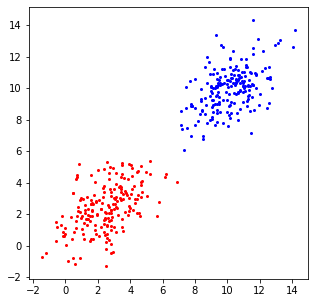

(200, 2) (200, 2)
(200, 3) (200,) (200, 3) (200,)
Percentage Correct After Training: 100.00 100.00
Percentage Correct After Training: 100.00 100.00
Percentage Correct After Training: 100.00 100.00
Percentage Correct After Training: 100.00 100.00
Percentage Correct After Training: 100.00 100.00
Percentage Correct After Training: 100.00 100.00
Percentage Correct After Training: 100.00 100.00


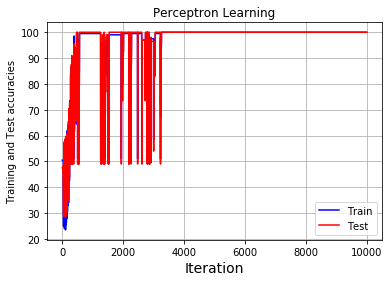

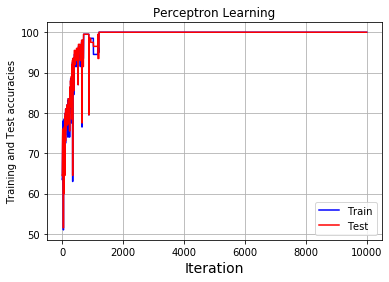

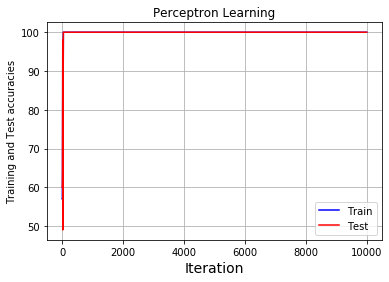

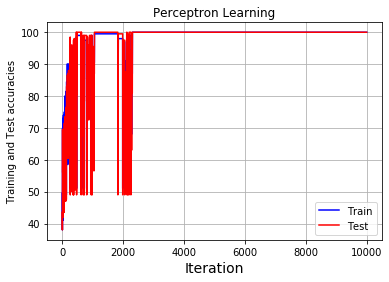

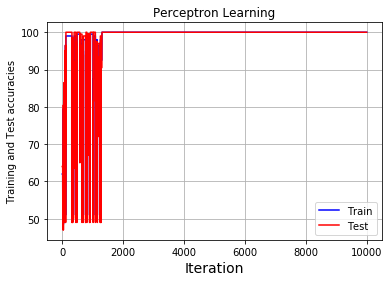

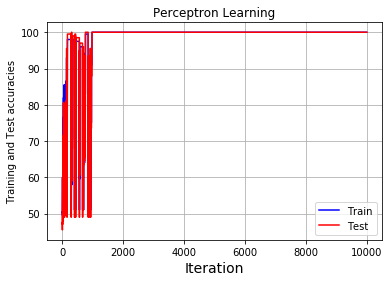

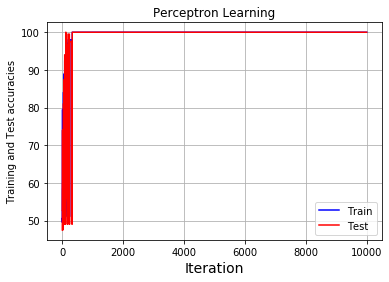

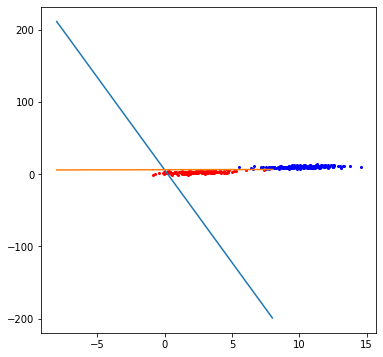

In [75]:
#Consider the problem with means at [2.5,2.5] and [10,10]
m1 = [[2.5, 2.5]]
m2 = [[10, 10]]
C = [[2, 1], [1, 2]]
numPerClass = 200
A = np.linalg.cholesky(C)
U1 = np.random.randn(numPerClass, 2)
X1 = U1 @ A.T + m1
U2 = np.random.randn(numPerClass, 2)
X2 = U2 @ A.T + m2
print(X1.shape, X2.shape)
# fig, ax = plt.subplots(figsize = (5,5))
# ax.scatter(X1[:,0], X1[:,1], c = 'r', s = 4)
# ax.scatter(X2[:,0], X2[:,1], c = 'b', s = 4)


X = np.concatenate([X1, X2], axis=0)
O = np.ones((2*numPerClass, 1)) 
X = np.append(X, O, axis=1)
labelPos = np.ones(numPerClass)
labelNeg = -1.0 * np.ones(numPerClass)
y = np.concatenate([labelPos, labelNeg])
# shuffle X and y
rIndex = np.random.permutation(2 * numPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
X_train = Xr[:numPerClass,:]
y_train = yr[:numPerClass]
X_test = Xr[numPerClass:2*numPerClass]
y_test = yr[numPerClass:2*numPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

def PercentCorrect(inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        oneInput = inputs[n,:]
        if (targets[n] * np.dot(oneInput, weights)) > 0:
            nCorrect += 1
    return 100 * nCorrect / N

w = np.random.randn(3)
alpha = [0.005,0.01,0.02,0.04,0.08,0.16,0.32]
MaxIter = 10000

for i in alpha:
    w = np.random.randn(3)
    p_train = np.zeros(MaxIter)
    p_test = np.zeros(MaxIter)
    for iter in range(MaxIter):
        r = np.floor(np.random.rand()*len(X_train)).astype(int)
        x = X_train[r,:]
        if y_train[r] * np.dot(x, w) < 0:
            # update weight
            w += i * y_train[r]*x
        p_train[iter] = PercentCorrect(X_train, y_train, w)
        p_test[iter] = PercentCorrect(X_test, y_test, w)
    fig, ax = plt.subplots(figsize = (6,4))
    ax.plot(range(MaxIter), p_train, 'b', label = "Train")
    ax.plot(range(MaxIter), p_test, 'r', label = "Test")
    ax.grid(True)
    ax.legend()
    ax.set_title("Perceptron Learning")
    ax.set_ylabel("Training and Test accuracies")
    ax.set_xlabel("Iteration", fontsize = 14)
    
    print("Percentage Correct After Training: %6.2f %6.2f" %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

plt.figure(figsize=(6,6))
plt.scatter(X1[:,0], X1[:,1], c = 'r', s = 4)
plt.scatter(X2[:,0], X2[:,1], c = 'b', s = 4)
plt.plot(np.linspace(-8,8,8),w[1]/w[0] * np.linspace(-8,8,8) - w[2]/w[1])
plt.plot(np.linspace(-8,8,8),-w[0]/w[1] * np.linspace(-8,8,8)- w[2]/w[1])
# plt.savefig('decisionBoundary2.png')

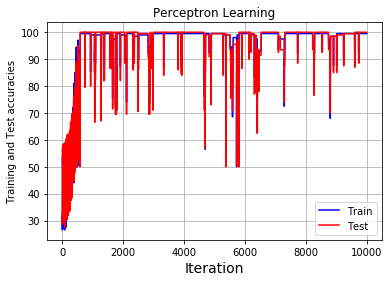

In [47]:
fig, ax = plt.subplots(figsize = (6,4))
ax.plot(range(MaxIter), p_train, 'b', label = "Train")
ax.plot(range(MaxIter), p_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test accuracies")
ax.set_xlabel("Iteration", fontsize = 14)
plt.savefig("LearningCurvesalpha0.002.png")

In [90]:
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.3f" %(accuracy_score(yh_train, y_train)))

yh_test = model.predict(X_test)
print("Accuracy on test set: %6.3f" %(accuracy_score(yh_test, y_test)))


Accuracy on training set:  0.869
Accuracy on test set:  0.894


/Users/zhangyan/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
def PercentCorrectBanknote(inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        oneInput = inputs[n,:]
        if (targets[n] * np.dot(oneInput, weights)) > 0:
            nCorrect += 1
    return 100 * nCorrect / N

In [121]:
banknote = pd.read_csv("data_banknote_authentication.csv",header=0)
banknote = pd.DataFrame(banknote)

In [122]:
# for column in banknote.columns[:-1]:
#     banknote[column] = (banknote[column]-banknote[column].mean())/banknote[column].std()
for row in range(len(banknote)):
    if banknote.iloc[row,-1]==0:
        banknote.iloc[row,-1]=-1

In [128]:
banknote.sample(5)
    

,VWTI,SWTI,CWTI,EI,class
540,3.977200,0.33521,2.25660,2.1625,-1
590,4.635200,-3.00870,2.67730,1.2120,-1
595,3.183600,7.23210,-1.07130,-2.5909,-1
1347,-5.385700,9.12140,-0.41929,-5.9181,1
296,0.051979,7.05210,-2.05410,-3.1508,-1


In [124]:
y = banknote[['class']].values
x = banknote[banknote.columns[:-1]].values

In [125]:
O = np.ones((len(x), 1))
X = np.append(x, O, axis = 1)

(686, 5) (686, 1) (686, 5) (686, 1)
Percentage Correct After Training:   0.99   0.98


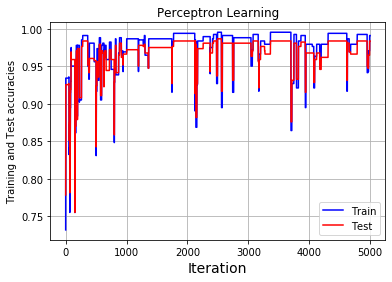

In [131]:
# shuffle X and y
rIndex = np.random.permutation(len(X))
n = len(X)//2
Xr = X[rIndex,]
yr = y[rIndex]
X_train = Xr[:n,:]
y_train = yr[:n]
X_test = Xr[n:,:]
y_test = yr[n:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

def PercentCorrect(inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        oneInput = inputs[n,:]
        if (targets[n] * np.dot(oneInput, weights)) > 0:
            nCorrect += 1
    return nCorrect / N

w = np.random.randn(5)
alpha = 0.1
MaxIter = 5000
p_train = np.zeros(MaxIter)
p_test = np.zeros(MaxIter)
for iter in range(MaxIter):
    r = np.floor(np.random.rand()*len(X_train)).astype(int)
    x = X_train[r,:]
    if y_train[r] * np.dot(x, w) < 0:
        # update weight
        w += alpha * y_train[r]*x
    p_train[iter] = PercentCorrect(X_train, y_train, w)
    p_test[iter] = PercentCorrect(X_test, y_test, w)
    

print("Percentage Correct After Training: %6.2f %6.2f" %(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


fig, ax = plt.subplots(figsize = (6,4))
ax.plot(range(MaxIter), p_train, 'b', label = "Train")
ax.plot(range(MaxIter), p_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title("Perceptron Learning")
ax.set_ylabel("Training and Test accuracies")
ax.set_xlabel("Iteration", fontsize = 14)
plt.savefig("LearningCurvesalpha0.002.png")

array([[ 4.75256796, -0.60004543],
       [ 2.39441583,  0.38271174],
       [ 3.83296829,  0.6302504 ],
       [ 6.33776782,  1.48593811],
       [ 4.53937554, -0.95879353],
       [-0.08255214,  4.63881862],
       [-0.12642299,  5.63109065],
       [ 4.31061662,  1.58798136],
       [-2.13966434,  4.42602136],
       [ 5.07085875, -1.08129282],
       [ 0.08270225,  3.83453153],
       [ 3.77283711, -0.61139906],
       [ 0.28242551,  4.20996189],
       [ 5.04958028,  0.08137263],
       [ 0.01187565,  6.46127209],
       [-0.64485962,  6.07479186],
       [ 3.51493605, -0.41650878],
       [ 4.51665405, -0.23156416],
       [-0.8720243 ,  5.79515754],
       [ 5.6048891 , -0.15363701],
       [ 2.888071  , -0.45746846],
       [ 3.73983989, -3.18655628],
       [-0.45333247,  4.52179645],
       [-0.08469518,  4.28834434],
       [ 6.27010058, -0.12113899],
       [ 3.35746867, -0.40076272],
       [-0.05040992,  4.28694677],
       [ 5.46976356, -2.09900425],
       [ 5.21788502,

In [17]:
X_train

array([[ 4.75256796, -0.60004543],
       [ 2.39441583,  0.38271174],
       [ 3.83296829,  0.6302504 ],
       [ 6.33776782,  1.48593811],
       [ 4.53937554, -0.95879353],
       [-0.08255214,  4.63881862],
       [-0.12642299,  5.63109065],
       [ 4.31061662,  1.58798136],
       [-2.13966434,  4.42602136],
       [ 5.07085875, -1.08129282],
       [ 0.08270225,  3.83453153],
       [ 3.77283711, -0.61139906],
       [ 0.28242551,  4.20996189],
       [ 5.04958028,  0.08137263],
       [ 0.01187565,  6.46127209],
       [-0.64485962,  6.07479186],
       [ 3.51493605, -0.41650878],
       [ 4.51665405, -0.23156416],
       [-0.8720243 ,  5.79515754],
       [ 5.6048891 , -0.15363701],
       [ 2.888071  , -0.45746846],
       [ 3.73983989, -3.18655628],
       [-0.45333247,  4.52179645],
       [-0.08469518,  4.28834434],
       [ 6.27010058, -0.12113899],
       [ 3.35746867, -0.40076272],
       [-0.05040992,  4.28694677],
       [ 5.46976356, -2.09900425],
       [ 5.21788502,